In [1]:
import numpy as np
from nansat.nansat import Nansat
from nansat.domain import Domain
from nansat.nsr import NSR
import matplotlib.pyplot as plt

In [2]:
narc = Nansat(
    '/vagrant/shared/test_data/cmems/ARC-METNO-ARC-TOPAZ4_2_PHYS-FOR-TDS-x10-X30-y55-Y73-20170518-20170526.nc', 
    netcdf_dim={'time': np.datetime64('2017-05-25')}) 

In [3]:
nglob = Nansat(
    '/vagrant/shared/test_data/cmems/GLOBAL_ANALYSIS_FORECAST_PHY_001_024-TDS-x10-X30-y55-Y73-201705181200-201705271200.nc',
    netcdf_dim={'time': np.datetime64('2017-05-25')}) 

In [4]:
d = Domain(NSR().wkt, '-te -10 55 30 73 -tr 0.125 0.125')
narc.reproject(d, addmask=False)
nglob.reproject(d, addmask=False)

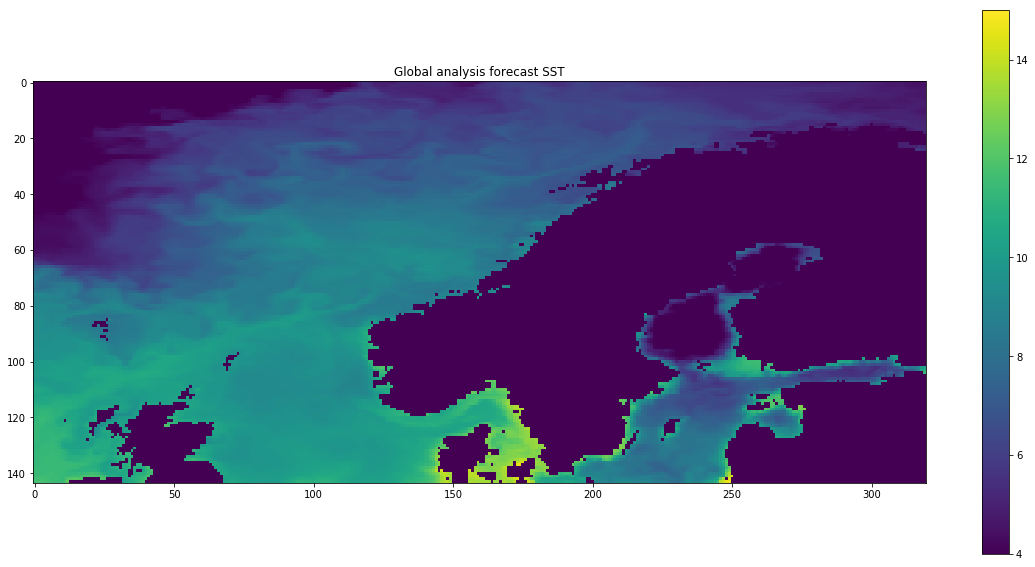

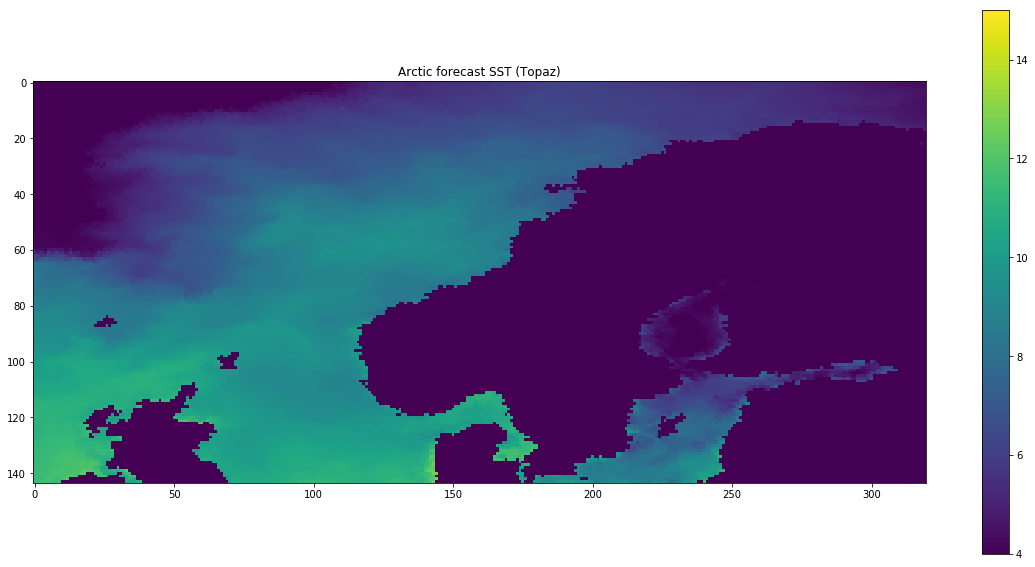

In [5]:
# Show sea surface temperature
plt.figure(figsize=(20,10))
#plt.subplot(1,2,1)
plt.imshow(nglob['thetao'], vmin=4, vmax=15)
plt.title('Global analysis forecast SST')
plt.colorbar()
plt.show()
#plt.subplot(1,2,2)
plt.figure(figsize=(20,10))
plt.imshow(narc['temperature'], vmin=4, vmax=15)
plt.title('Arctic forecast SST (Topaz)')
plt.colorbar()
plt.show()

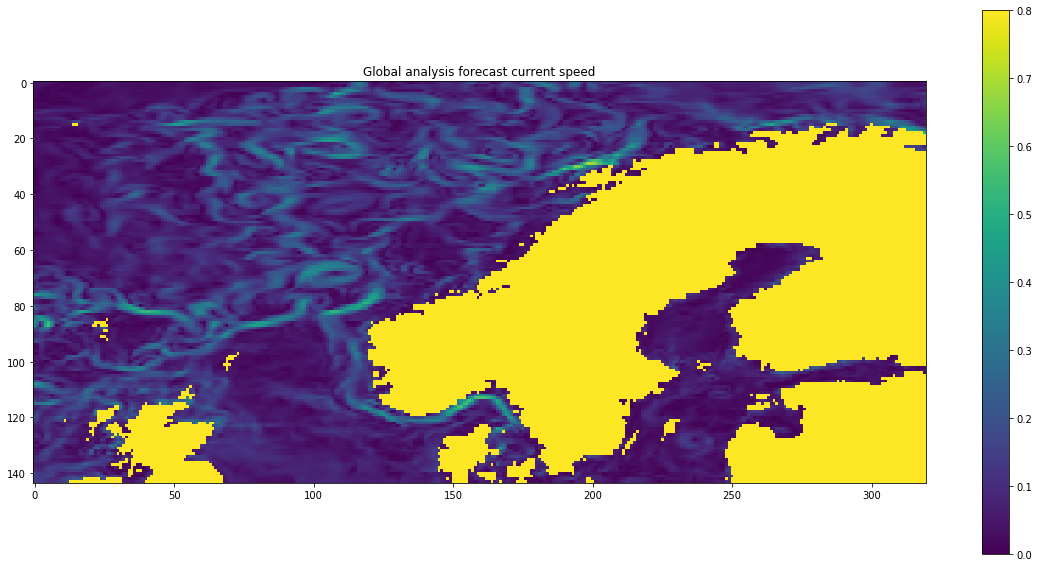

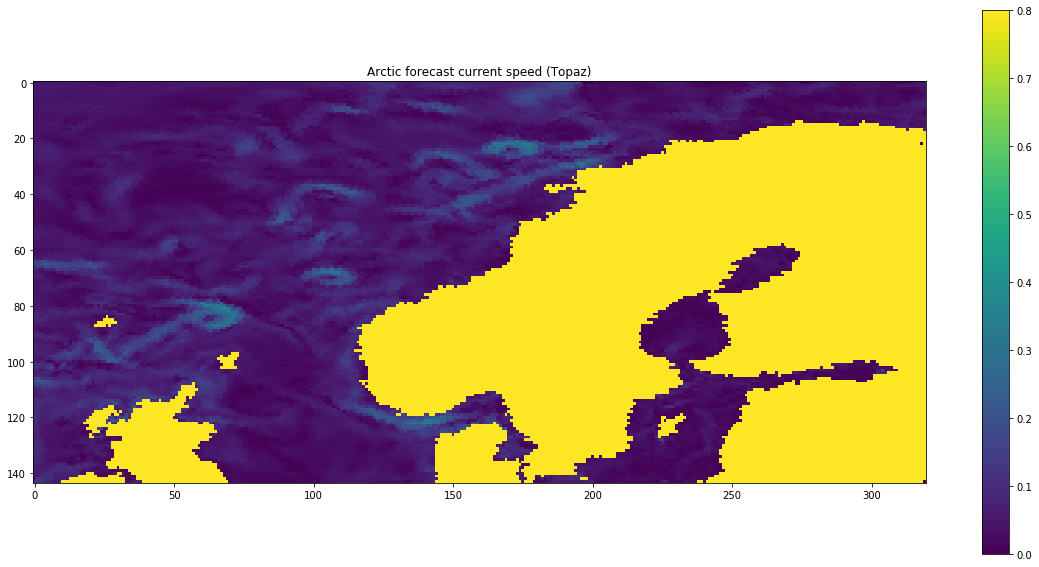

In [6]:
# Show current speed
plt.figure(figsize=(20,10))
#plt.subplot(1,2,1)
plt.imshow(np.sqrt(np.square(nglob['uo'])+np.square(nglob['vo'])), vmin=0, vmax=0.8)
plt.title('Global analysis forecast current speed')
plt.colorbar()
plt.show()
#plt.subplot(1,2,2)
plt.figure(figsize=(20,10))
plt.imshow(np.sqrt(np.square(narc['u'])+np.square(narc['v'])), vmin=0, vmax=0.8)
plt.title('Arctic forecast current speed (Topaz)')
plt.colorbar()
plt.show()